<a href="https://colab.research.google.com/github/Anuj-1996/Telecom-Churn-Analysis/blob/main/Anuj_Chavan_EDA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [5]:
# Importing CSV from the drive and converting csv to pandas df
df = pd.read_csv('/content/drive/MyDrive/Copy of Telecom Churn.csv')



In [6]:
# Displaying 1st five rows
df.head(11)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,Yes,No,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [7]:
df.shape

(3333, 20)

In [8]:
# list of columns in the dataset
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [9]:
#checking the data type of each column
df.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [10]:
def initial_overview(dataset):
    
    '''
    This function allows to view initial overview of the data.
    Such as number of rows, features and feature labels, 
    is/are there any missing value/s in the data set?,
    unique values in the dataset


    '''
    print('Overview of the Dataset')

    #shape of the Dataset
    print('\n Shape:',df.shape)

    #Rows in the dataset
    print("Rows:", df.shape[0])

    #Column or Feature in the dataset
    print("\nNumber of features:", df.shape[1])
    print("\nFeatures:")
    print(df.columns.tolist())

    #missing value
    missing_value = df.isnull().sum().values.sum()

    if missing_value == 0:
      print('\n Missing Values: No Missing Values')
    else:
      print('\n Missing Values:', missing_value)

    #unique value

    print("\n Unique values:")
    print(df.nunique())

     #Data Type
    print("\n Datatype:")
    print(df.dtypes)

In [11]:
initial_overview(df)

Overview of the Dataset

 Shape: (3333, 20)
Rows: 3333

Number of features: 20

Features:
['State', 'Account length', 'Area code', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']

 Missing Values: No Missing Values

 Unique values:
State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
T

Encoding:Binary Encoding

Converting 'Yes', 'No', 'True' and 'False' to '1' and '0'. It will make sense wihile comparing two data and with the correlation matrix


In [12]:
#Encoding
df["Int_Churn"] = df["Churn"].astype(int)
df["Int_Voice_mail_plan"] = df["Voice mail plan"].map({'Yes': 1, 'No': 0})
df["Int_International_plan"] = df["International plan"].map({'Yes': 1, 'No': 0})

#State Encoding
#Creating key from pd.Series and stored in key variable
key= pd.Series(df['State'])
#converting it into set for unique values or 'Key' of the state
key = set(key)
#Converting it into list
key= list(key)
len(key)

#For encoding each state will have number from 1 to 51
value =[]
for i in range (1,52, 1):
  
  value.append(i)

#Converting valuse list into dictonary

State_Dict = {key[i]: value[i] for i in range(len(key))}

df["Int_State"] = df["State"].map(State_Dict)


In [13]:
df[df['Churn']==True].T


,10,15,21,33,41,48,54,57,69,76,...,3268,3272,3280,3287,3291,3301,3304,3320,3322,3323
State,IN,NY,CO,AZ,MD,ID,WY,CO,TX,DC,...,WA,MD,AR,KS,MI,CA,IL,GA,MD,IN
Account length,65,161,77,12,135,119,87,121,150,82,...,84,133,76,170,119,84,71,122,62,117
Area code,415,415,408,408,408,415,415,408,510,415,...,415,510,408,415,510,415,510,510,408,415
International plan,No,No,No,No,Yes,No,No,No,No,No,...,No,No,No,No,Yes,No,Yes,Yes,No,No
Voice mail plan,No,No,No,No,Yes,No,No,Yes,No,No,...,No,No,No,Yes,Yes,No,No,No,No,No
Number vmail messages,0,0,0,0,41,0,0,30,0,0,...,0,0,0,42,22,0,0,0,0,0
Total day minutes,129.1,332.9,62.4,249.6,173.1,159.1,151.0,198.4,178.9,300.3,...,289.1,295.0,107.3,199.5,172.1,280.0,186.1,140.0,321.1,118.4
Total day calls,137,67,89,118,85,114,83,129,101,109,...,100,141,140,119,119,113,114,101,105,126
Total day charge,21.95,56.59,10.61,42.43,29.43,27.05,25.67,33.73,30.41,51.05,...,49.15,50.15,18.24,33.92,29.26,47.6,31.64,23.8,54.59,20.13
Total eve minutes,228.5,317.8,169.9,252.4,203.9,231.3,219.7,75.3,169.1,181.0,...,233.8,223.6,238.2,135.0,223.6,202.2,198.6,196.4,265.5,249.3


## Statistics of Call Minutes

Avaerage and Standard Deviation

In [14]:
avg_day_call_min = round(df['Total day minutes'].mean(), 2)
std_day_call_min  = round(df['Total day minutes'].std(), 2)

avg_eve_call_min  = round(df['Total eve minutes'].mean(), 2)
std_eve_call_min  = round(df['Total eve minutes'].std(), 2)

avg_night_call_min  = round(df['Total night minutes'].mean(), 2)
std_night_call_min  = round(df['Total night minutes'].std(), 2)

print(f'Average Total Day Call Minuites are {avg_day_call_min} with Standard Deviation of {std_day_call_min} ')
print(f'Average Total Evening Call Minuites are {avg_eve_call_min} with Standard Deviation of {std_eve_call_min} ')
print(f'Average Total Night Call Minuites are {avg_night_call_min} with Standard Deviation of {std_night_call_min} ')



Average Total Day Call Minuites are 179.78 with Standard Deviation of 54.47 
Average Total Evening Call Minuites are 200.98 with Standard Deviation of 50.71 
Average Total Night Call Minuites are 200.87 with Standard Deviation of 50.57 


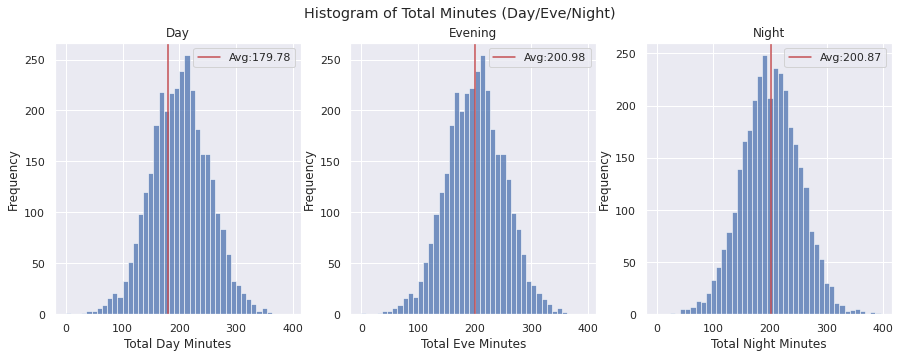

In [69]:
#@title Call Minutes Histogram Plot

#define plotting region (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(15,5))
fig.suptitle('Histogram of Total Minutes (Day/Eve/Night)')

#title of each subplot
axes[0].set_title('Day')
axes[1].set_title('Evening')
axes[2].set_title('Night' )

# X and Y label
axes[0].set_xlabel('Total Day Minutes')
axes[0].set_ylabel('Frequency')

axes[1].set_xlabel('Total Eve Minutes')
axes[1].set_ylabel('Frequency')

axes[2].set_xlabel('Total Night Minutes')
axes[2].set_ylabel('Frequency')

#vertical average line
axes[0].axvline(avg_day_call_min, color = 'r', label = 'Avg:'+str(avg_day_call_min) )
axes[1].axvline(avg_eve_call_min, color = 'r', label = 'Avg:'+str(avg_eve_call_min) )
axes[2].axvline(avg_night_call_min, color = 'r',label = 'Avg:'+str(avg_night_call_min) )

#create histogram in each subplot
sns.histplot(df['Total eve minutes'], ax=axes[0])
sns.histplot(df['Total eve minutes'], ax=axes[1])
sns.histplot(df['Total night minutes'], ax=axes[2])

#plot legend of each subplot
axes[0].legend()
axes[1].legend()
axes[2].legend()

In [16]:
#correlation with Churn

correlation_total_day_min = round(df['Int_Churn'].corr(df['Total day minutes']), 2)
correlation_total_eve_min =  round(df['Int_Churn'].corr(df['Total eve minutes']), 2)
correlation_total_night_min = round(df['Int_Churn'].corr(df['Total night minutes']), 2)

print(f'Correlation between Total Day Minutes and Churn is {correlation_total_day_min} ')
print(f'Correlation between Total Evening Minutes and Churn is {correlation_total_eve_min} ')
print(f'Correlation between Total Night Minutes and Churn is {correlation_total_night_min} ')

Correlation between Total Day Minutes and Churn is 0.21 
Correlation between Total Evening Minutes and Churn is 0.09 
Correlation between Total Night Minutes and Churn is 0.04 


In [17]:
correlation_Voice_mail_plan = round(df['Int_Churn'].corr(df['Int_Voice_mail_plan']), 2)
correlation_International_plan = round(df['Int_Churn'].corr(df['Int_International_plan']), 2)
correlation_Voice_mail_plan,correlation_International_plan

(-0.1, 0.26)

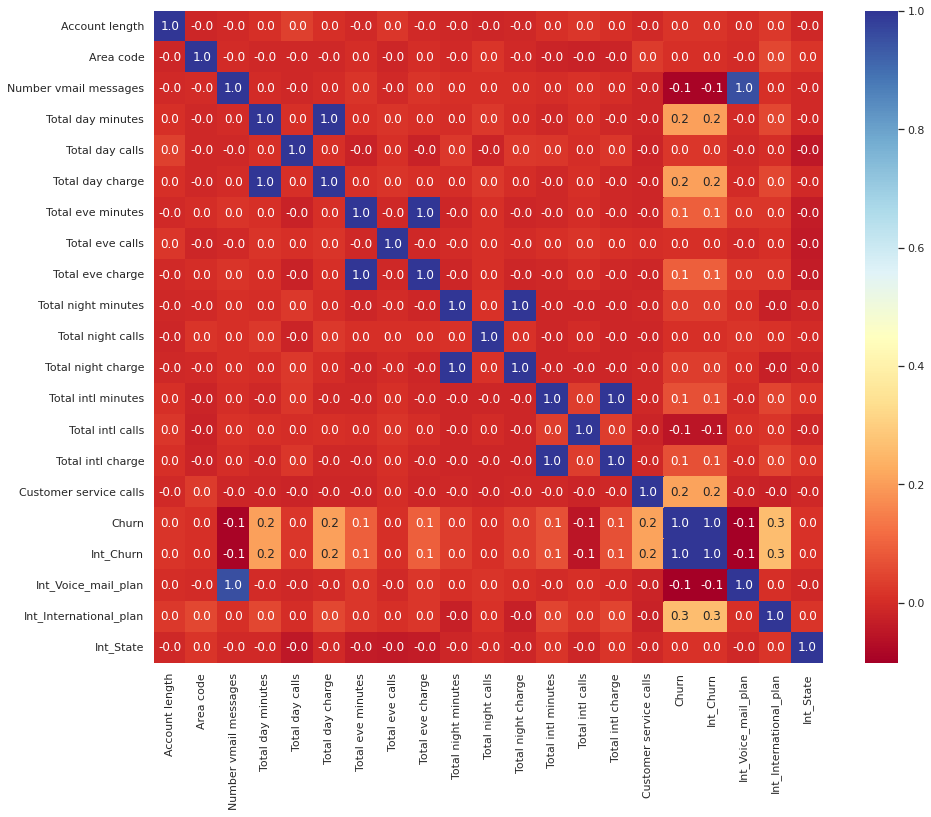

In [18]:
plt.figure(figsize = (15, 12))
sns.heatmap(df.corr(), cmap="RdYlBu", annot=True, fmt=".1f")
plt.show()

In [19]:
import plotly.graph_objs as go
trace = []

def gen_boxplot(df):
    for feature in df:
        trace.append(
            go.Box(
                name = feature,
                y = df[feature]
            )
        )
        
gen_boxplot(df)

In [20]:
import plotly
data = trace
plotly.offline.iplot(data)

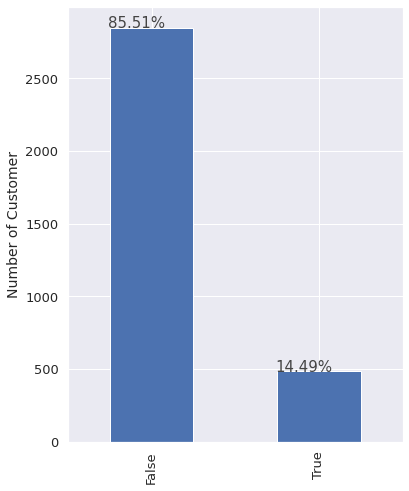

In [21]:
ax = df["Churn"].value_counts().plot(kind='bar', figsize=(6, 8), fontsize=13)
ax.set_ylabel("Number of Customer", fontsize=14);

totals = []
for i in ax.patches:
    totals.append(i.get_height())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x() - .01, i.get_height() + .5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='#444444')
plt.show()

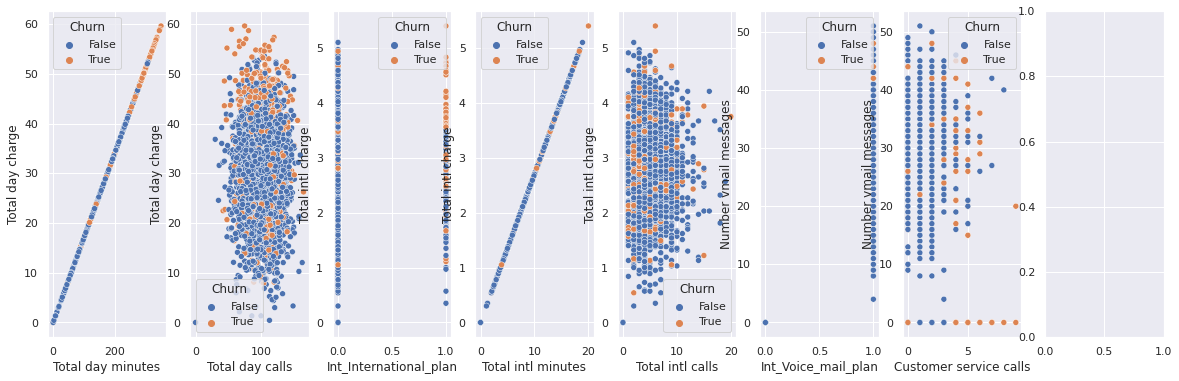

In [22]:
_, ax = plt.subplots(1, 8, figsize= (20, 6))
sns.scatterplot(x="Total day minutes", y = "Total day charge" , hue="Churn", data=df, ax=ax[0])
sns.scatterplot(x="Total day calls", y = "Total day charge" , hue="Churn", data=df, ax=ax[1])
sns.scatterplot(x="Int_International_plan", y = "Total intl charge" , hue="Churn", data=df, ax=ax[2])
sns.scatterplot(x="Total intl minutes", y = "Total intl charge" , hue="Churn", data=df, ax=ax[3])
sns.scatterplot(x="Total intl calls", y = "Total intl charge" , hue="Churn", data=df, ax=ax[4])
sns.scatterplot(x="Int_Voice_mail_plan", y = "Number vmail messages" , hue="Churn", data=df, ax=ax[5])# No correl
sns.scatterplot(x="Customer service calls", y = "Number vmail messages" , hue="Churn", data=df, ax=ax[6])

In [23]:
df[(df['Churn']==True) & (df['State']=='NJ')].T

,89,626,787,946,966,1102,1105,1585,1739,1903,2033,2113,2380,2526,2660,2724,2731,2773
State,NJ,NJ,NJ,NJ,NJ,NJ,NJ,NJ,NJ,NJ,NJ,NJ,NJ,NJ,NJ,NJ,NJ,NJ
Account length,128,95,24,46,48,111,135,85,80,93,162,60,53,57,88,182,127,134
Area code,415,408,408,408,510,510,510,415,415,510,408,408,408,510,415,415,510,510
International plan,No,Yes,No,No,No,No,No,No,No,Yes,No,No,No,Yes,No,No,No,No
Voice mail plan,No,Yes,No,No,Yes,No,Yes,No,No,Yes,No,No,No,No,No,No,No,Yes
Number vmail messages,0,37,0,0,22,0,28,0,0,38,0,0,0,0,0,0,0,34
Total day minutes,237.9,220.2,265.6,257.4,152.0,176.9,201.4,236.9,268.7,225.7,217.6,289.8,228.6,115.0,301.5,279.1,245.2,247.2
Total day calls,125,109,86,67,63,128,100,93,120,117,87,101,117,65,136,124,91,105
Total day charge,40.44,37.43,45.15,43.76,25.84,30.07,34.24,40.27,45.68,38.37,36.99,49.27,38.86,19.55,51.26,47.45,41.68,42.02
Total eve minutes,247.6,185.3,208.8,261.1,258.8,102.8,246.5,197.7,301.0,119.6,279.0,255.6,132.8,122.3,257.7,180.5,217.2,225.5


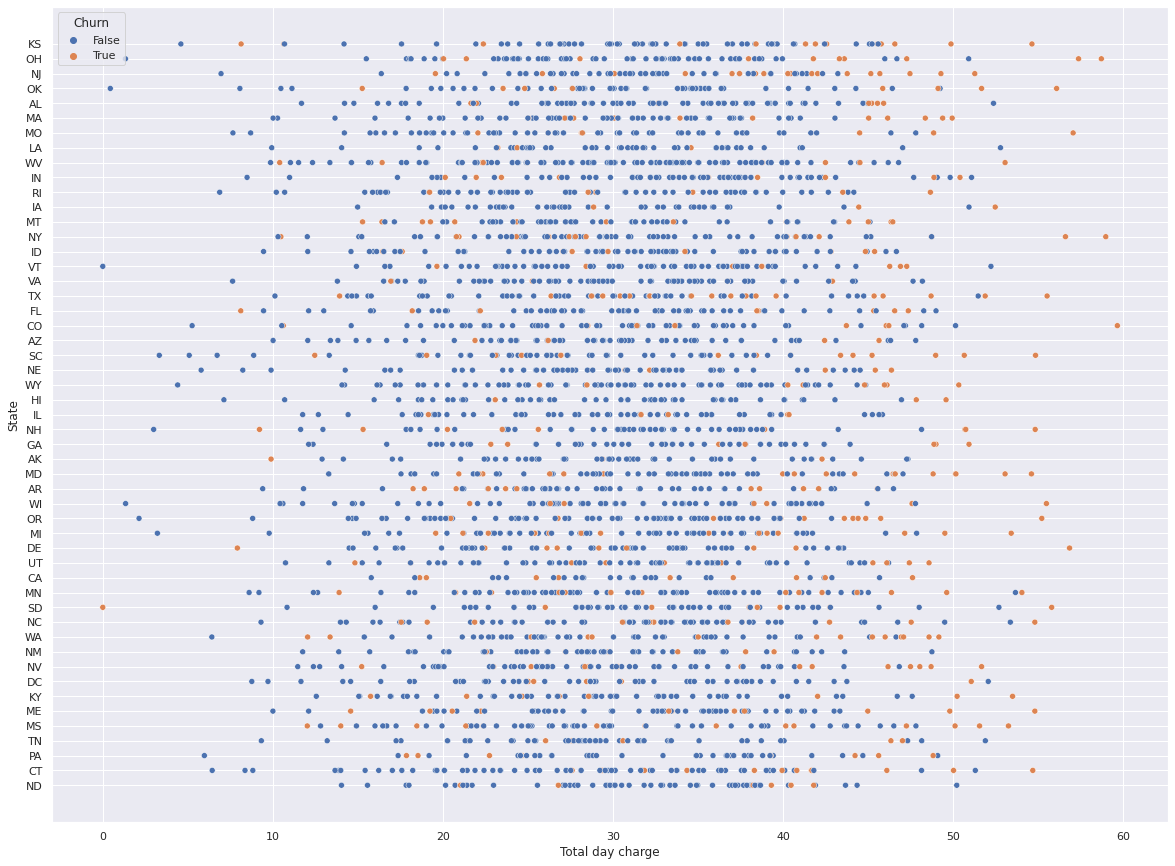

In [24]:
plt.figure(figsize= (20, 15))
sns.scatterplot(y="State", x = "Total day charge" , hue="Churn", data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



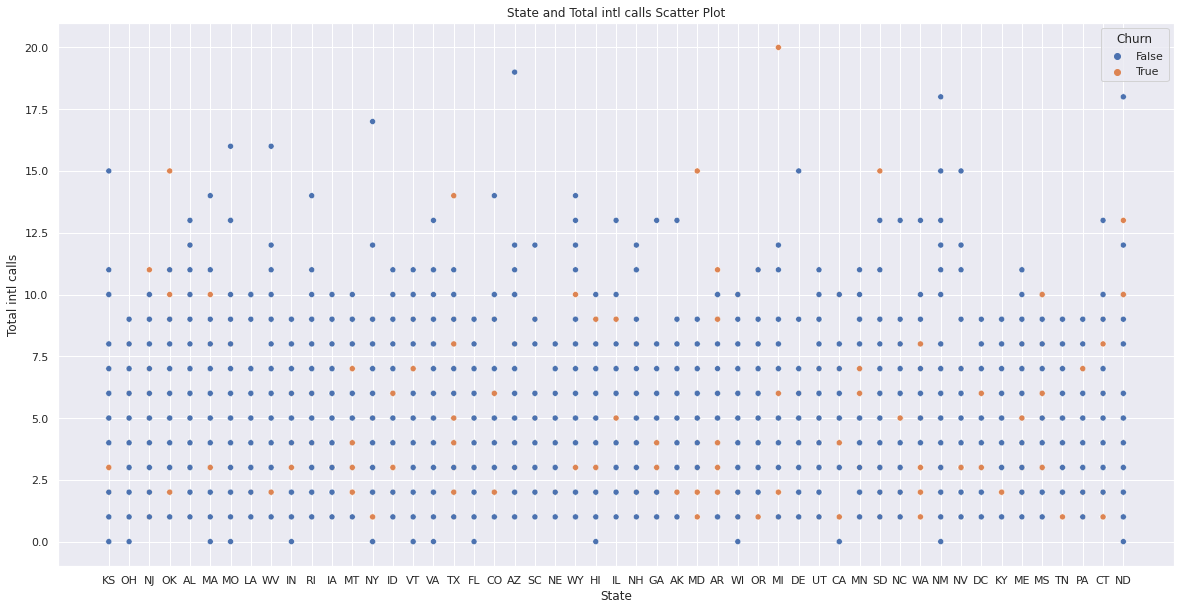

In [36]:
def df_scattr(x_coordinate,y_coordinate,dataframe,title_of_x_coordinate,title_of_y_coordinate,hue): 


    '''
    This function takes x and y coordinate as an input to Seaborn scatter plot.
    dataframe - pandas working DataFrame
    title_of_x_coordinate - title of x coordinate
    title_of_y_coordinate - title of y coordinate
    hue - in the sns catterplot you can comapare the x and y with respect to boolean 1-0 or true or false.
    '''
    plt.figure(figsize=(20,10))
    sns.scatterplot(x_coordinate,y_coordinate, data=dataframe,hue=hue).set(title=f'{title_of_x_coordinate} and {title_of_y_coordinate} Scatter Plot')
    plt.show()



df_scattr(df['State'], df['Total intl calls'], df, 'State', 'Total intl calls' , 'Churn')